In [1]:
import xupy as xp
import matplotlib.pyplot as plt


[XuPy] Device 0 available - GPU : `NVIDIA GeForce RTX 4060 Laptop GPU`
       Memory = 7805.56 MB | Compute Capability = 8.9
       Using CuPy 13.5.1 for acceleration.


In [2]:
fs = 1000
T = 1/fs
Td = 2*T

In [3]:
om = lambda f: 2*xp.pi*f
OLTF = lambda G,T,Td,f: G*T/om(f) * (xp.sinc(om(f)*T/2))**2 * xp.exp(-1j*om(f)*Td-1j*xp.pi/2)
RESTF = lambda G,T,Td,f: 1.0/(1.0+OLTF(G,T,Td,f))
NTF = lambda G,T,Td,f: OLTF(G,T,Td,f)/(1.0+OLTF(G,T,Td,f))

In [4]:
def plot_tf(tf,freq):
    amp = xp.abs(tf)
    ang = xp.unwrap(xp.angle(tf))

    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(xp.asnumpy(freq),xp.asnumpy(amp))
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim([1e-8,1e-2])

    plt.subplot(2,1,2)
    plt.plot(xp.asnumpy(freq),xp.asnumpy(ang*180/xp.pi))
    plt.grid()
    plt.xscale('log')
    plt.ylim([-270,0])
    plt.yticks([0,-90,-180,-270])

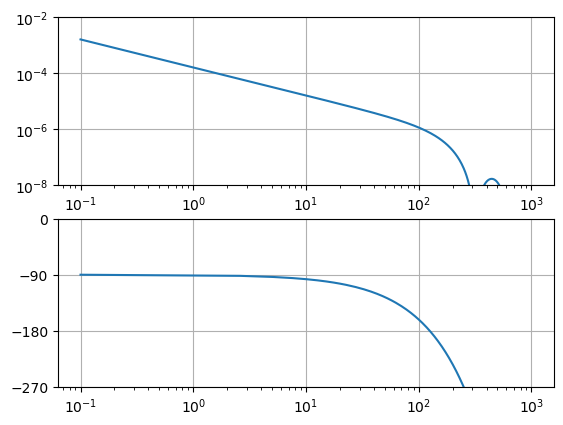

In [5]:
freq = xp.linspace(0.1,1000,400)

G = 1

tf = OLTF(G,T,Td,freq)
plot_tf(tf,freq)

In [6]:
Gopt = xp.pi/(4*T*Td)

Text(0.5, 1.0, 'Noise propagation transfer function')

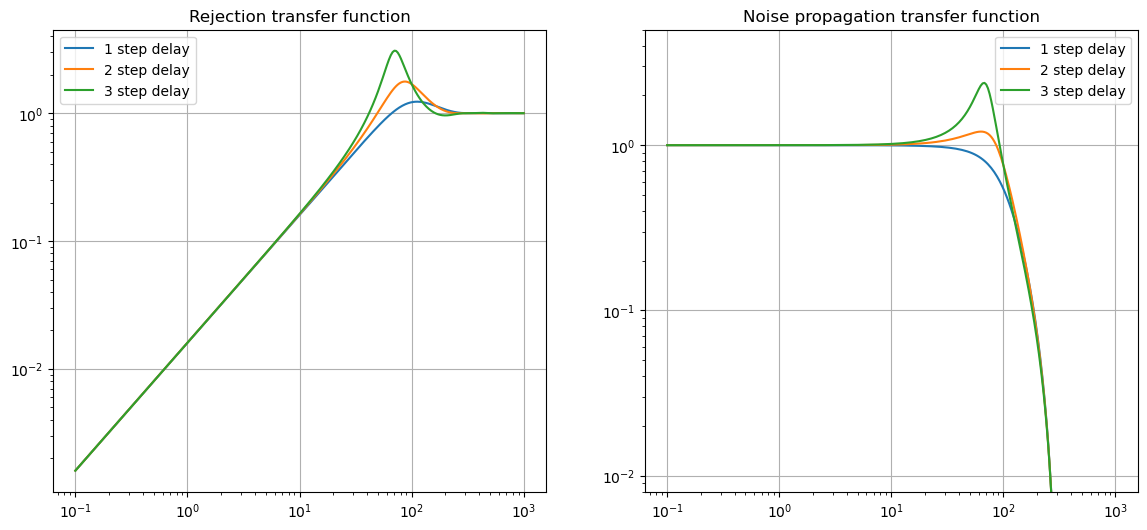

In [7]:
restf1 = RESTF(Gopt,T,T*1,freq)
restf2 = RESTF(Gopt,T,T*2,freq)
restf3= RESTF(Gopt,T,T*3,freq)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf1)),label='1 step delay')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf2)),label='2 step delay')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf3)),label='3 step delay')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Rejection transfer function')

ntf1 = NTF(Gopt,T,T*1,freq)
ntf2 = NTF(Gopt,T,T*2,freq)
ntf3 = NTF(Gopt,T,T*3,freq)

plt.subplot(1,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf1)),label='1 step delay')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),label='2 step delay')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf3)),label='3 step delay')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylim([8e-3,5])
plt.title('Noise propagation transfer function')


Text(0.5, 1.0, 'Noise propagation transfer function')

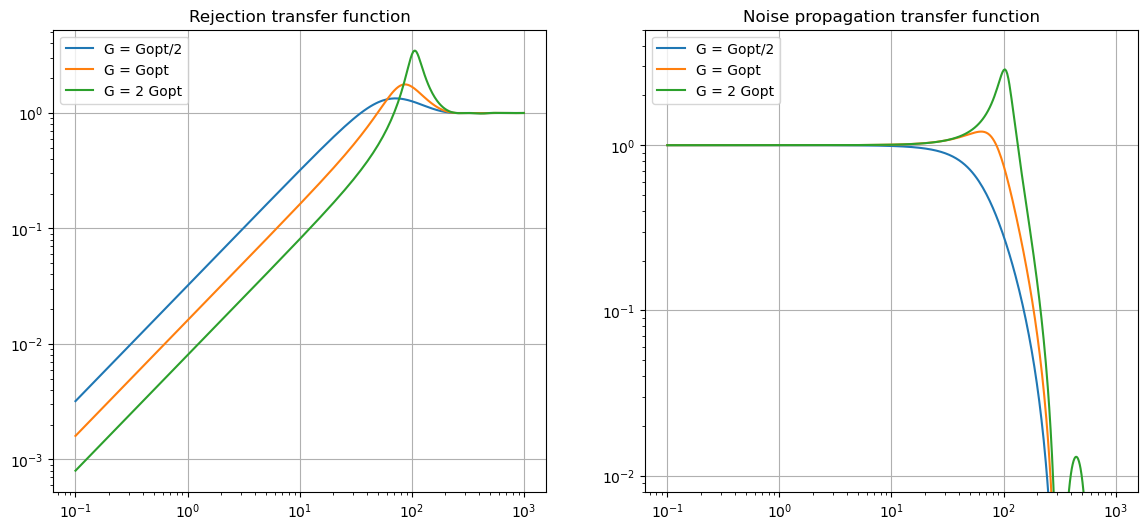

In [8]:
restf1 = RESTF(0.5*Gopt,T,Td,freq)
restf2 = RESTF(Gopt,T,Td,freq)
restf3= RESTF(2*Gopt,T,Td,freq)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf1)),label='G = Gopt/2')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf2)),label='G = Gopt')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf3)),label='G = 2 Gopt')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Rejection transfer function')

ntf1 = NTF(0.5*Gopt,T,Td,freq)
ntf2 = NTF(Gopt,T,Td,freq)
ntf3 = NTF(2*Gopt,T,Td,freq)

plt.subplot(1,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf1)),label='G = Gopt/2')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),label='G = Gopt')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf3)),label='G = 2 Gopt')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylim([8e-3,5])
plt.title('Noise propagation transfer function')

Text(0.5, 1.0, 'Noise propagation transfer function')

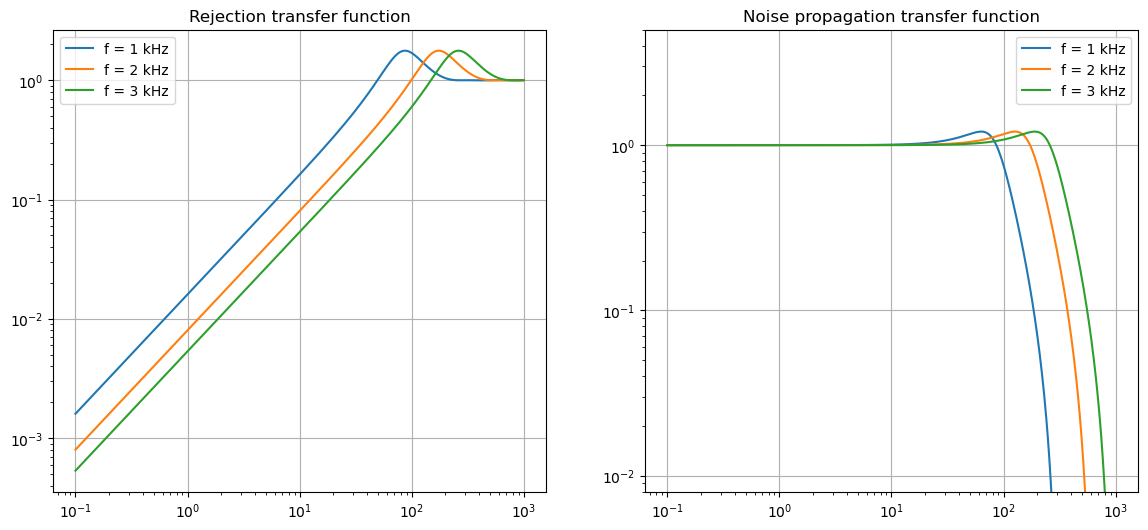

In [9]:
Gopt = xp.pi/(4*T*T*2)

fs = 1000
f2 = 2*fs
f3 = 3*fs

restf1 = RESTF(Gopt,1/fs,2/fs,freq)
restf2 = RESTF(4*Gopt,1/f2,2/f2,freq)
restf3= RESTF(9*Gopt,1/f3,2/f3,freq)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf1)),label='f = 1 kHz')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf2)),label='f = 2 kHz')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf3)),label='f = 3 kHz')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Rejection transfer function')

ntf1 = NTF(Gopt,1/1000,Td,freq)
ntf2 = NTF(4*Gopt,1/f2,2/f2,freq)
ntf3 = NTF(9*Gopt,1/f3,2/f3,freq)

plt.subplot(1,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf1)),label='f = 1 kHz')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),label='f = 2 kHz')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf3)),label='f = 3 kHz')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylim([8e-3,5])
plt.title('Noise propagation transfer function')

In [10]:
# freq = xp.linspace(0.1,1e+4,1000)

# splatt = lambda M,C,K,f: 1/(M*om(f)**2 + 1j*C*om(f) + K)
# splattPID = lambda Kp,Kd,Ki,T,Td,f: (Kp + Kd*om(f) + Ki/om(f)) * T*(xp.sinc(om(f)*T/2))**2 * xp.exp(-1j*om(f)*Td-1j*xp.pi/2)
# splattTF = lambda M,C,K,Kp,Kd,Ki,T,Td,f: splatt(M,C,K,f)/(1.0+splattPID(Kp,Kd,Ki,T,Td,f)*splatt(M,C,K,f))

# fs = 1818
# Kp = 500 #fs**2
# Kd = 0
# Ki = 0

# M = 0.04
# C = 0
# K = 100

# tf = splattTF(M,C,K,Kp,Kd,Ki,1/fs,1/fs,freq)
# amp = xp.abs(tf)
# ang = xp.unwrap(xp.angle(tf))

# plt.figure()
# plt.subplot(2,1,1)
# plt.plot(xp.asnumpy(freq),xp.asnumpy(amp))
# plt.grid()
# plt.xscale('log')
# plt.yscale('log')
# # plt.ylim([1e-8,1e-2])

# plt.subplot(2,1,2)
# plt.plot(xp.asnumpy(freq),xp.asnumpy(ang*180/xp.pi))
# plt.grid()
# plt.xscale('log')
# # plt.ylim([-270,0])
# # plt.yticks([0,-90,-180,-270])

Text(0.5, 0, 'Frequency [Hz]')

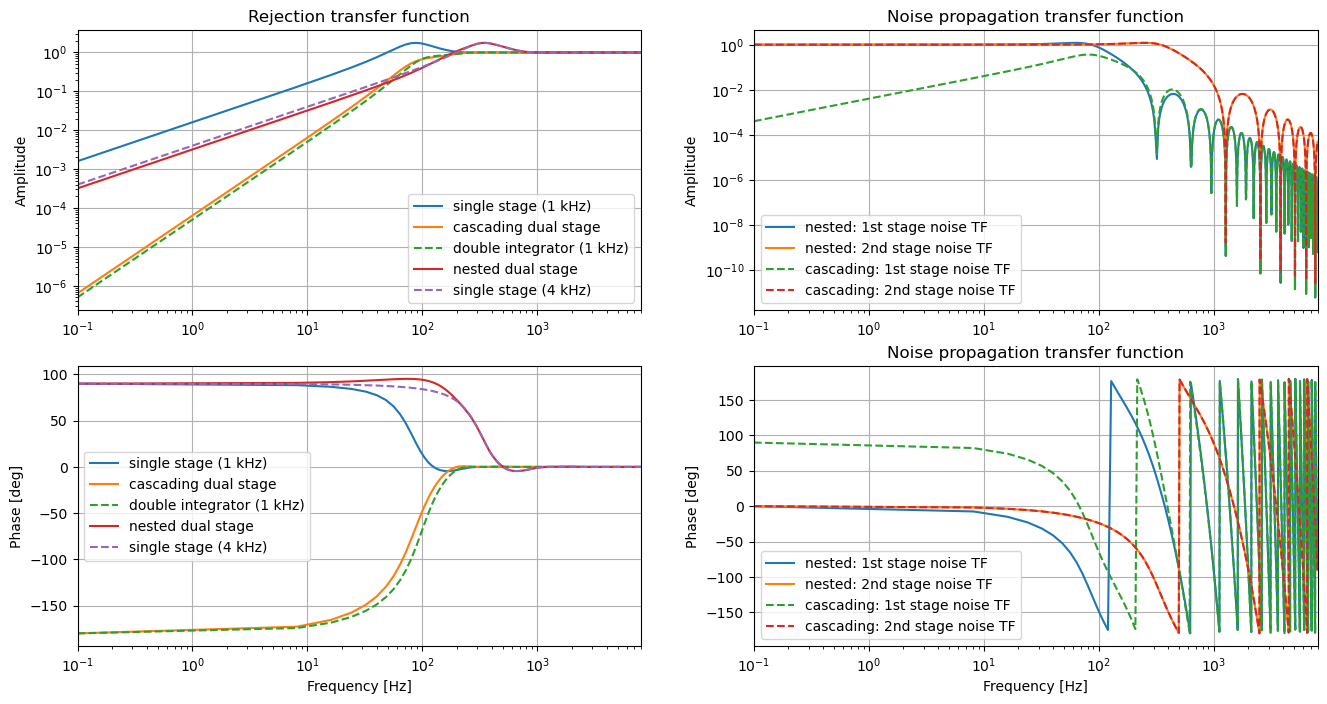

In [11]:
# Cascading
rad2deg = 180/xp.pi
f1 = 1000
f2 = 4000
freq = xp.linspace(0.1,f2*2,1000)

oltf1 = OLTF(Gopt,1/f1,2/f1,freq)
oltf2 = OLTF(Gopt*(f2/f1)**2,1/f2,2/f2,freq)

DOLTF = lambda G,T,Td,f: G*T/om(f)**2 * (xp.sinc(om(f)*T/2))**2 * xp.exp(-1j*om(f)*Td-1j*xp.pi)
dGopt = 2*xp.pi/(4*(1/f1)**3*2)

ssao_tf = 1.0/(1.0+oltf1)
cascao_tf = 1.0/(1.0+oltf1*oltf2)
nestao_tf = 1.0/(1.0+oltf1+oltf2)

ssao4khz_tf = 1.0/(1.0+oltf2)
dint_tf = 1.0/(1.0+DOLTF(dGopt,1/f1,2/f1,freq))


ntf1 = oltf1/(1+oltf1)
ntf2 = oltf2/(1+oltf2)
ntf12 = ntf1*1.0/(1.0+oltf2)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ssao_tf)),label=f'single stage ({f1/1e+3:1.0f} kHz)')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(cascao_tf)),label='cascading dual stage')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(dint_tf)),'--',label=f'double integrator ({f1/1e+3:1.0f} kHz)')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(nestao_tf)),label='nested dual stage')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ssao4khz_tf)),'--',label=f'single stage ({f2/1e+3:1.0f} kHz)')
plt.legend()
plt.grid()
plt.xlim([0.1,f2*2])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Amplitude')
plt.title('Rejection transfer function')
plt.subplot(2,2,3)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(ssao_tf)*rad2deg),label=f'single stage ({f1/1e+3:1.0f} kHz)')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(cascao_tf)*rad2deg),label='cascading dual stage')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(dint_tf)*rad2deg),'--',label=f'double integrator ({f1/1e+3:1.0f} kHz)')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(nestao_tf)*rad2deg),label='nested dual stage')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(ssao4khz_tf)*rad2deg),'--',label=f'single stage ({f2/1e+3:1.0f} kHz)')
plt.legend()
plt.grid()
plt.xlim([0.1,f2*2])
plt.xscale('log')
plt.ylabel('Phase [deg]')
plt.xlabel('Frequency [Hz]')

plt.subplot(2,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf1)),label='nested: 1st stage noise TF')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),label='nested: 2nd stage noise TF')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf12)),'--',label='cascading: 1st stage noise TF')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),'--',label='cascading: 2nd stage noise TF')
plt.legend()
plt.grid()
plt.xlim([0.1,f2*2])
plt.xscale('log')
plt.yscale('log')
plt.title('Noise propagation transfer function')
plt.ylabel('Amplitude')
plt.subplot(2,2,4)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(ntf1)*rad2deg),label='nested: 1st stage noise TF')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(ntf2)*rad2deg),label='nested: 2nd stage noise TF')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(ntf12)*rad2deg),'--',label='cascading: 1st stage noise TF')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(ntf2)*rad2deg),'--',label='cascading: 2nd stage noise TF')
plt.legend()
plt.grid()
plt.xlim([0.1,f2*2])
plt.xscale('log')
plt.title('Noise propagation transfer function')
plt.ylabel('Phase [deg]')
plt.xlabel('Frequency [Hz]')

In [12]:
freq =xp.linspace(0.1,1e+4,5000)

D = 1.8
V = 18
n = 1
f_cut = 0.3*(n+1)*V/D
f_low = freq[freq<=f_cut]
f_high = freq[freq>f_cut]

sigma2 = 1.0

# PSD = bilinear_psd(freq, f_cut, sigma2)
PSD = xp.where(freq<=f_cut,freq**(-2/3),f_cut**5 * freq**(-17/3))
PSD *= sigma2/xp.sum(PSD)

def get_temporal_psd(freq, n:int, sigma2:float, D:float, V:float):
    f_cut = 0.3*(n+1)*V/D
    PSD = xp.where(freq<=f_cut,1,f_cut**(17/3) * freq**(-17/3))
    # PSD *= sigma2/xp.trapz(PSD,freq)
    PSD *= sigma2/xp.sum(PSD)
    return PSD

# plt.figure()
# plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.sqrt(PSD)))
# plt.plot([xp.asnumpy(f_cut),xp.asnumpy(f_cut)],[0.8*xp.asnumpy(xp.sqrt(PSD[-1])),1.2*xp.asnumpy(xp.sqrt(PSD[0]))],'--')
# plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.sqrt(get_temporal_psd(freq,2,sigma2,D,V))))
# plt.xscale('log')
# plt.yscale('log')
# plt.grid()

In [13]:
# Von Kamran spectrum
r0 = 8.92e-3
L0 = 25

f = xp.linspace(0.001,100,2000)
k = 2.0 * xp.pi * f
k0 = 2.0 * xp.pi / float(L0)
vKPSD = 0.023 * (float(r0) ** (-5.0/3.0)) * (k * k + k0 * k0) ** (-11.0/6.0)

vonKarman_power = lambda r0,L0,f: 0.023 * (r0**(-5.0/3.0)) * ((2*xp.pi*f)**2 + (2*xp.pi/L0)**2)**(-11.0/6.0)


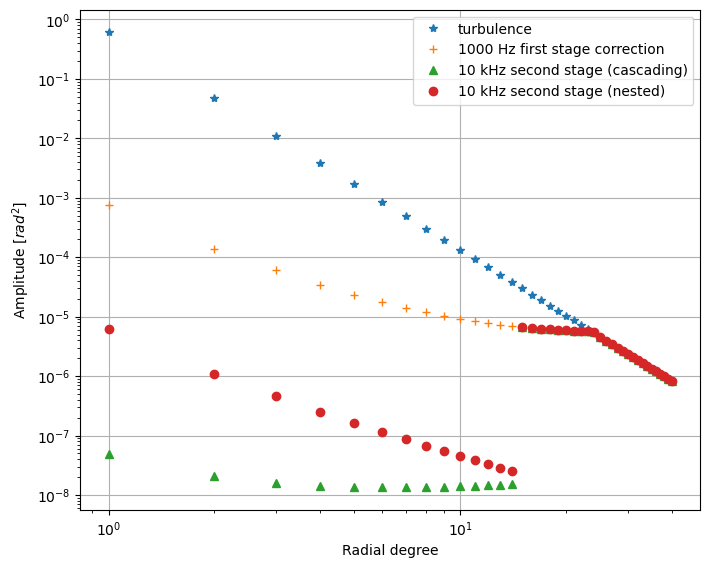

In [14]:
f1 = 1000
f2 = 10000

Gopt = 2*xp.pi/(4*(1/f1)**2*2)

oltf1 = OLTF(Gopt,1/f1,2/f1,freq)
oltf2 = OLTF(Gopt*(f2/f1)**2,1/f2,2/f2,freq)

ssao_tf = 1.0/(1.0+oltf1)
cascao_tf = 1.0/(1.0+oltf1*oltf2)
nestao_tf = 1.0/(1.0+oltf1+oltf2)

rad_orders = xp.arange(1,40+1)
N = len(rad_orders)
psd_err = xp.zeros(N)
ssao_err = xp.zeros(N)
cascao_err = xp.zeros(N)
nestao_err = xp.zeros(N)

Nmodes_1st_stage = 600
Nmodes_2nd_stage = 200
n_cut_1st = xp.floor(xp.sqrt(Nmodes_1st_stage))
n_cut_2nd = xp.floor(xp.sqrt(Nmodes_2nd_stage))

for k,n in enumerate(rad_orders):
    sigma2 = vonKarman_power(r0,L0,n/D)
    PSD = get_temporal_psd(freq, n, sigma2, D, V)
    psd_err[k] = sigma2
    ssao_err[k] = xp.sum(PSD*xp.abs(ssao_tf)**2) if n <= n_cut_1st else sigma2
    cascao_err[k] = xp.sum(PSD*xp.abs(cascao_tf)**2) if n <= n_cut_2nd else ssao_err[k]
    nestao_err[k] = xp.sum(PSD*xp.abs(nestao_tf)**2) if n <= n_cut_2nd else ssao_err[k]
    # ssao_err[k] = xp.trapz(PSD*xp.abs(ssao_tf)**2,freq) if n <= n_cut_1st else sigma2
    # cascao_err[k] = xp.trapz(PSD*xp.abs(cascao_tf)**2,freq) if n <= n_cut_2nd else ssao_err[k]
    # nestao_err[k] = xp.trapz(PSD*xp.abs(nestao_tf)**2,freq) if n <= n_cut_2nd else ssao_err[k]

plt.figure(figsize=(8,6.5))
plt.plot(xp.asnumpy(rad_orders),xp.asnumpy(psd_err),'*',label='turbulence')
plt.plot(xp.asnumpy(rad_orders),xp.asnumpy(ssao_err),'+',label=f'{f1:1.0f} Hz first stage correction')
plt.plot(xp.asnumpy(rad_orders),xp.asnumpy(cascao_err),'^',label=f'{f2/1e+3:1.0f} kHz second stage (cascading)')
plt.plot(xp.asnumpy(rad_orders),xp.asnumpy(nestao_err),'o',label=f'{f2/1e+3:1.0f} kHz second stage (nested)')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Radial degree')
plt.ylabel(r'Amplitude $[rad^2]$')
plt.grid()

In [15]:
C = lambda G,om0,f: G/((om(f)-om0) * om(f)) 
leakyC = lambda G,om0,f: G/(om(f)-om0)

OLTF2 = lambda G,T,Td,om0,f: C(G,om0,f) * T*(xp.sinc(om(f)*T/2))**2 * xp.exp(-1j*om(f)*Td-1j*xp.pi/2)
RESTF2 = lambda G,T,Td,om0,f: 1.0/(1.0+OLTF2(G,T,Td,om0,f))
NTF2 = lambda G,T,Td,om0,f: OLTF2(G,T,Td,om0,f)/(1.0+OLTF2(G,T,Td,om0,f))

lOLTF = lambda G,T,Td,om0,f: leakyC(G,om0,f) * T*(xp.sinc(om(f)*T/2))**2 * xp.exp(-1j*om(f)*Td-1j*xp.pi/2)
lRESTF = lambda G,T,Td,om0,f: 1.0/(1.0+lOLTF(G,T,Td,om0,f))
lNTF = lambda G,T,Td,om0,f: lOLTF(G,T,Td,om0,f)/(1.0+lOLTF(G,T,Td,om0,f))


Text(0.5, 0, 'Frequency [Hz]')

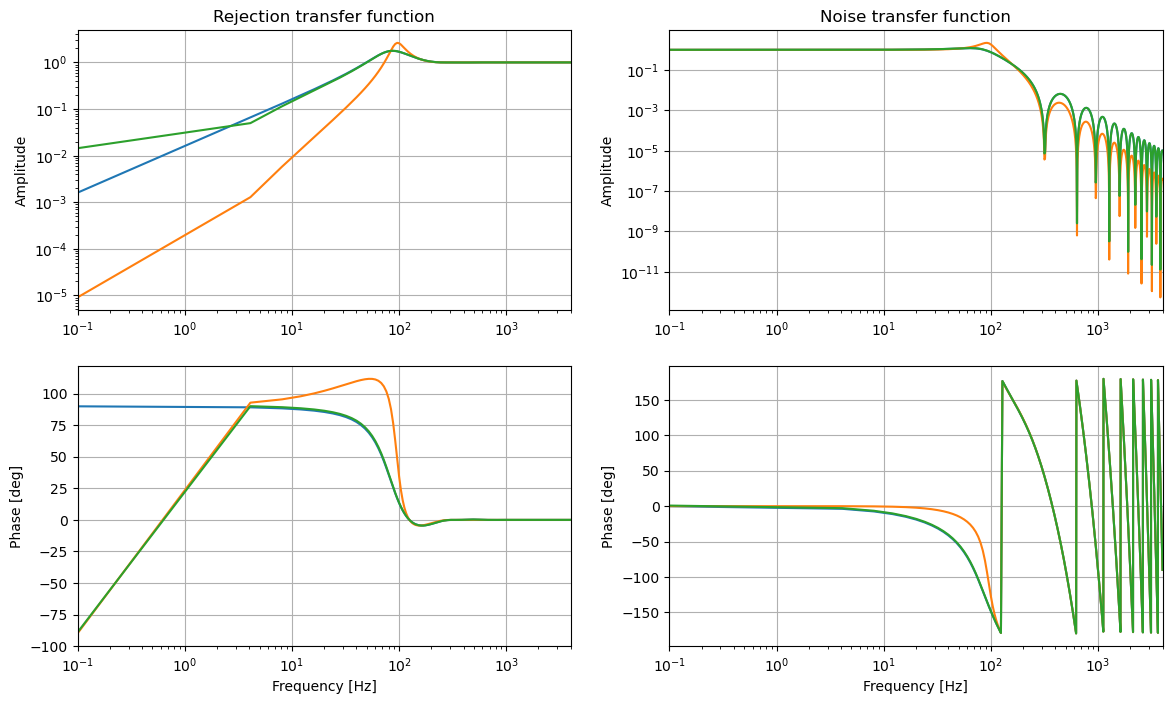

In [16]:
f1 = 1000
fmax = 4000
T = 1/f1
Td = 2*T
om0 = 1*2*xp.pi
Gopt = xp.pi/(4*T*Td)

freq = xp.linspace(1e-1,fmax,1000)

rtf = RESTF(Gopt,T,Td,freq)
rtf2 = RESTF2(Gopt/T,T,Td,om0,freq)
leaky_rtf = lRESTF(Gopt,T,Td,om0,freq)

ntf = NTF(Gopt,T,Td,freq)
ntf2 = NTF2(Gopt/T,T,Td,om0,freq)
leaky_ntf = lNTF(Gopt,T,Td,om0,freq)

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(rtf)))
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(rtf2)))
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(leaky_rtf)))
plt.grid()
plt.ylabel('Amplitude')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.1,fmax])
plt.title('Rejection transfer function')
plt.subplot(2,2,3)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(rtf))*rad2deg)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(rtf2))*rad2deg)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(leaky_rtf))*rad2deg)
plt.grid()
plt.xscale('log')
plt.xlim([0.1,fmax])
plt.ylabel('Phase [deg]')
plt.xlabel('Frequency [Hz]')

plt.subplot(2,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf)))
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)))
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(leaky_ntf)))
plt.grid()
plt.ylabel('Amplitude')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.1,fmax])
plt.title('Noise transfer function')
plt.subplot(2,2,4)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(ntf))*rad2deg)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(ntf2))*rad2deg)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.angle(leaky_ntf))*rad2deg)
plt.grid()
plt.xscale('log')
plt.xlim([0.1,fmax])
plt.ylabel('Phase [deg]')
plt.xlabel('Frequency [Hz]')

In [17]:
import sympy as sp
import numpy as np

def get_iir_from_zeros_and_poles(zeros:list,poles:list):
    zeros = np.array(zeros)
    poles = np.array(poles)
    z = sp.symbols('z')
    num = np.prod((z-zeros))
    num = sp.Poly(sp.expand(num))
    den = np.prod((z-poles))
    den = sp.Poly(sp.expand(den))
    return num.all_coeffs(), den.all_coeffs()

In [18]:
n,d = get_iir_from_zeros_and_poles(zeros=[0.45,0.85],poles=[1.,0.995])
print(n,d)

[1.00000000000000, -1.30000000000000, 0.382500000000000] [1.00000000000000, -1.99500000000000, 0.995000000000000]


In [19]:
def get_tf_from_zeros_and_poles(zeros:list, poles:list, T:float):
    zeros = np.array(zeros)
    poles = np.array(poles)
    z,s = sp.symbols('z s')
    Hz = sp.expand(np.prod((z-zeros))/np.prod((z-poles)))
    Hs = sp.factor(Hz.subs(z, (1+T/2*s)/(1-T/2*s))) # tustin transform
    return Hs

In [25]:
C = get_tf_from_zeros_and_poles([0.45,0.85],[1.,0.995],T)
sp.expand(C)

0.134125*s**2/(0.1995*s**2 + 1.0*s) + 123.5*s/(0.1995*s**2 + 1.0*s) + 16500.0/(0.1995*s**2 + 1.0*s)